In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook && pip install timm
import fastbook
fastbook.setup_book()

In [3]:
#hide
import timm
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import os
data_path = os.path.join('/storage/rock-paper-scissors', 'rockpaperscissors')

/storage/rock-paper-scissors/rockpaperscissors/rock/QM8un28uGzplAkrb.png


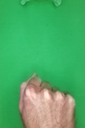

In [41]:
paths = get_image_files(data_path)
print(str(paths[9]))

im = Image.open(paths[2])
#transposed  = im.transpose(Image.ROTATE_180)
im.shape
im.to_thumb(128,128)
#transposed.save(str(paths[23]))

In [39]:
# Rotate images by 270 degrees anticlock wise
for path in get_image_files(data_path):
    im = Image.open(path)
    transposed  = im.transpose(Image.ROTATE_270)
    transposed.save(str(path))


/tmp/ipykernel_629/3977949922.py:4: DeprecationWarning: ROTATE_270 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_270 instead.
  transposed  = im.transpose(Image.ROTATE_270)


In [44]:
rps_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(size=128, min_scale=0.5),
    batch_tfms=aug_transforms())

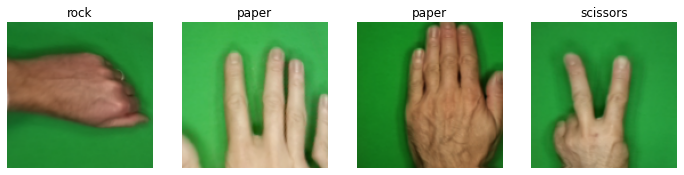

In [45]:
rps_dls = rps_db.dataloaders(data_path)
rps_dls.train.show_batch(max_n=4, unique=False, nrows=1)

In [46]:
learn = vision_learner(rps_dls, resnet50, metrics=error_rate)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.117505,0.027156,0.006865,00:09
1,0.090005,0.022811,0.013730,00:08


In [13]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [47]:
learn = vision_learner(rps_dls, 'convnext_tiny_in22k', metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.057540,0.012404,0.002288,00:26


In [48]:
learn.export()

In [49]:
learn.model

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
            )
            (1): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 